In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
csv_file_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']


list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

print(merged_df)

            date       open       high        low      close     volume  Name
0     2013-02-08    67.7142    68.4014    66.8928    67.8542  158168416  AAPL
1     2013-02-11    68.0714    69.2771    67.6071    68.5614  129029425  AAPL
2     2013-02-12    68.5014    68.9114    66.8205    66.8428  151829363  AAPL
3     2013-02-13    66.7442    67.6628    66.1742    66.7156  118721995  AAPL
4     2013-02-14    66.3599    67.3771    66.2885    66.6556   88809154  AAPL
...          ...        ...        ...        ...        ...        ...   ...
1254  2018-02-01  1445.0000  1459.8800  1385.1400  1390.0000    9113808  AMZN
1255  2018-02-02  1477.3900  1498.0000  1414.0000  1429.9500   11125722  AMZN
1256  2018-02-05  1402.6200  1458.9800  1320.7200  1390.0000   11494985  AMZN
1257  2018-02-06  1361.4600  1443.9900  1351.7900  1442.8400   11066819  AMZN
1258  2018-02-07  1449.0000  1460.9900  1415.1500  1416.7800    7162741  AMZN

[4752 rows x 7 columns]


In [35]:
merged_df.shape

(4752, 7)

In [36]:
merged_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [37]:
tech_list = merged_df['Name'].unique()

##### Analyze closing price of all the stocks

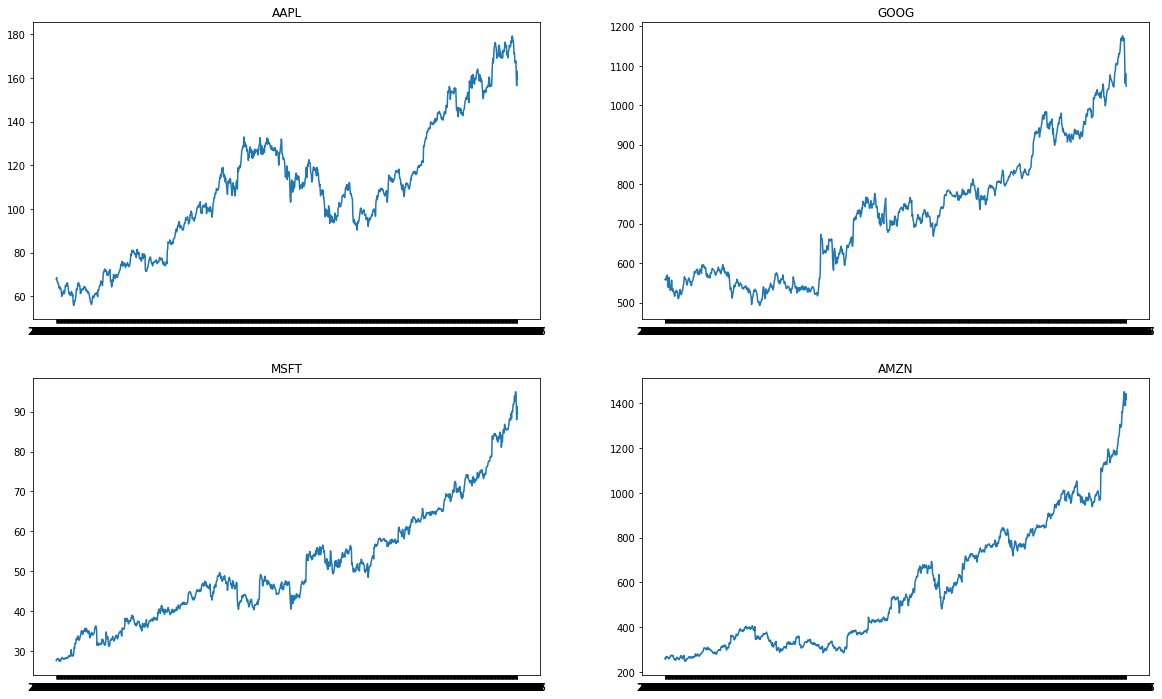

In [38]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=merged_df[merged_df['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

#### Analysing the total volume of stock being traded each day

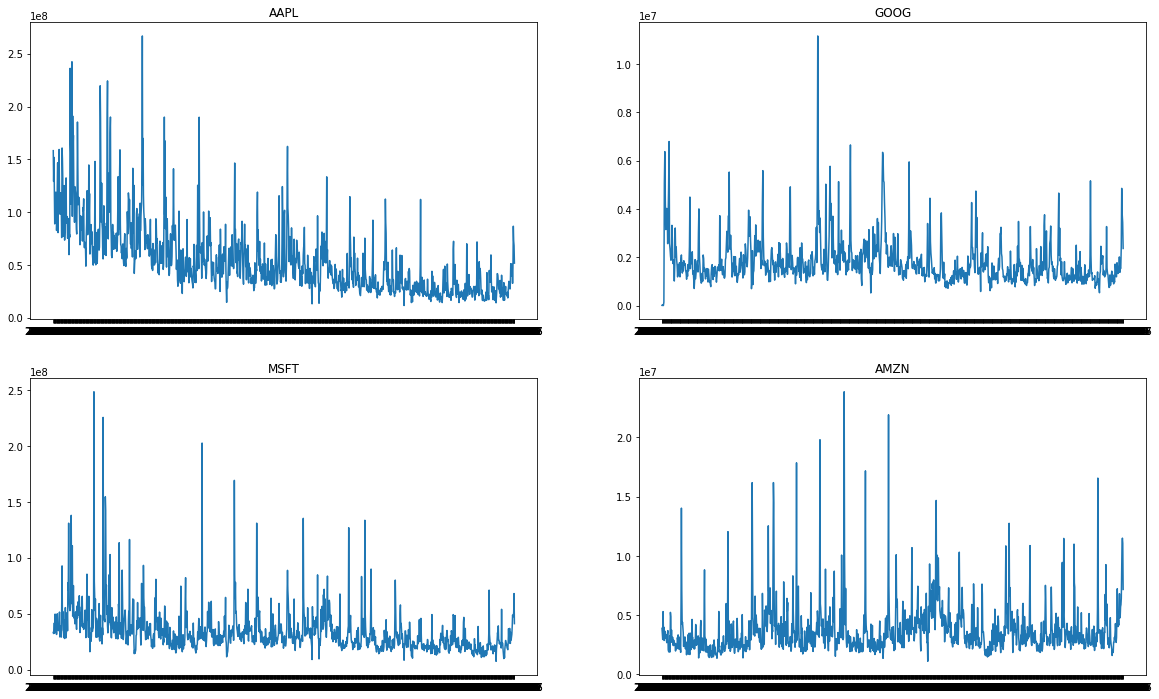

In [39]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=merged_df[merged_df['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)

Daily Stock Return Formula
To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 


In [40]:
df = pd.read_csv("AAPL_data.csv")

In [41]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100
df.head()

,date,open,high,low,close,volume,Name,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.443624


#### Using mathplot for visualzation

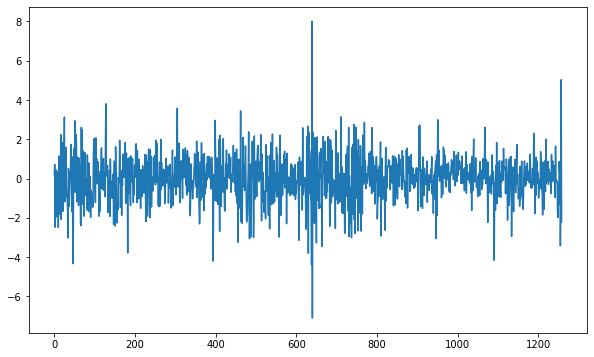

In [42]:
plt.figure(figsize=(10,6))
df['1day % return'].plot()

#### Checking if the stock priices of companies are correlatted


In [43]:
# creatting a blank dataframe
close=pd.DataFrame()

In [74]:
close.head()

,apple,amazon,google,microsoft,appl_change
0,67.8542,261.95,558.46,27.55,0.206325
1,68.5614,257.21,559.99,27.86,0.714688
2,66.8428,258.70,556.97,27.88,-2.481344
3,66.7156,269.47,567.16,28.03,-0.042869
4,66.6556,269.24,567.00,28.04,0.443624


In [45]:
apple = pd.read_csv("AAPL_data.csv")

In [46]:
amazon = pd.read_csv("AMZN_data.csv")

In [47]:
google = pd.read_csv("GOOG_data.csv")

In [48]:
microsoft = pd.read_csv("MSFT_data.csv")

In [49]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


##### extracting the close column from each dataset to make a correlation analysis

In [58]:
close['apple']=apple['close']
close['amazon']=amazon['close']
close['google']=google['close']
close['microsoft']=microsoft['close']

In [59]:
close.head()

,apple,amazon,google,microsoft
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


In [60]:
#sns.pairplot(data=close)

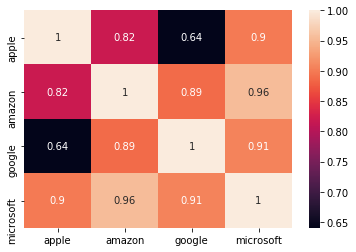

In [61]:
sns.heatmap(close.corr(),annot=True)

###### Closing price of amazon and microsoft are well correlated as .96

In [70]:
close

,apple,amazon,google,microsoft,appl_change
0,67.8542,261.95,558.46,27.55,0.206325
1,68.5614,257.21,559.99,27.86,0.714688
2,66.8428,258.70,556.97,27.88,-2.481344
3,66.7156,269.47,567.16,28.03,-0.042869
4,66.6556,269.24,567.00,28.04,0.443624
...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.366551
1255,160.5000,1429.95,NaN,91.78,-3.426791
1256,156.4900,1390.00,NaN,88.00,-1.667838
1257,163.0300,1442.84,NaN,91.33,5.029749
